Number of times the confidence interval did not cover the true value: 4


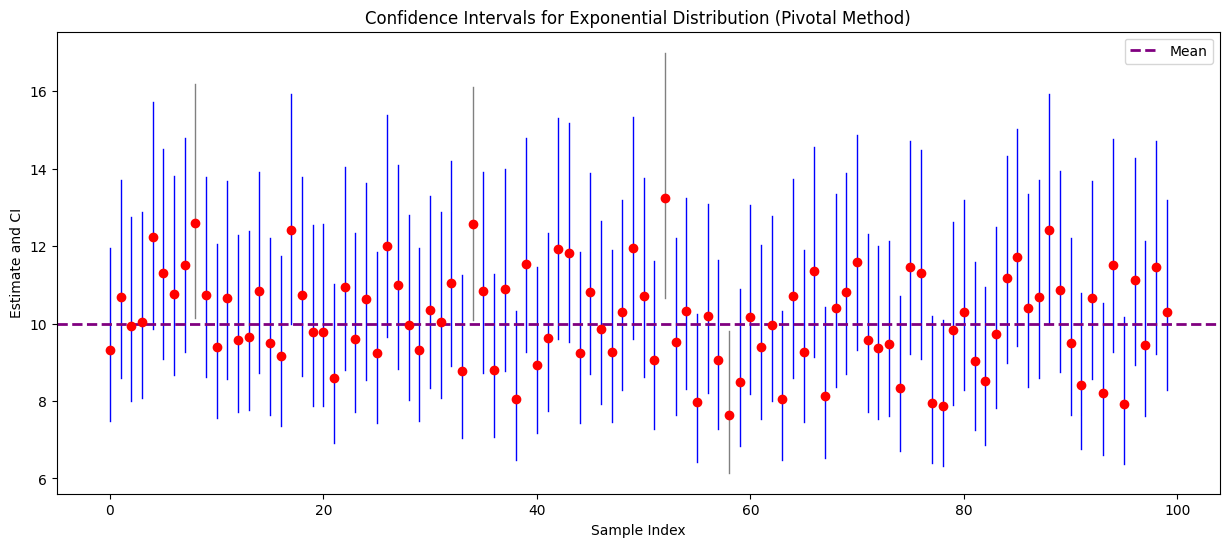

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# we know that if X ~ Expo(mean = 1/lambda) then lambda * X ~ Expo(mean = 1)
# and Sum of n iid Expo with theta mean is Gamma(alpha = n, mean = theta)
# Gamma(alpha = meu/2, theta = 2) ~ chiSqaure(meu) 
# 2 * lambda * Gamma(n, 1/lambda) ~ chiSqaure(2n)

n_samples = 100 
sample_size = 50
# True mean for Expo 
true_theta = 10  
# Significance level  
alpha = 0.10     

np.random.seed(47)
samples = np.random.exponential(scale=true_theta, size=(n_samples, sample_size))
theta_hats = samples.mean(axis=1)  # Sample means

# chi-square values
chi2_lower = chi2.ppf(alpha / 2, df=2 * sample_size)
chi2_upper = chi2.ppf(1 - alpha / 2, df=2 * sample_size)

# confidence levels
lower_bounds = (2 * sample_size * theta_hats) / chi2_upper
upper_bounds = (2 * sample_size * theta_hats) / chi2_lower

# Count how many times the confidence interval does not cover the true value
missed_count = np.sum((lower_bounds > true_theta) | (upper_bounds < true_theta))
print(f"Number of times the confidence interval did not cover the true value: {missed_count}")

plt.figure(figsize=(15, 6))
for i in range(n_samples):
    color = 'blue' if lower_bounds[i] <= true_theta <= upper_bounds[i] else 'gray'
    plt.plot([i, i], [lower_bounds[i], upper_bounds[i]], color=color, lw=1)
    plt.scatter(i, theta_hats[i], color='red', zorder=3)


plt.axhline(y=true_theta, color='purple', linestyle='--', linewidth=2, label='Mean')

plt.xlabel("Sample Index")
plt.ylabel("Estimate and CI")
plt.title("Confidence Intervals for Exponential Distribution (Pivotal Method)")
plt.legend()
plt.show()
